In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [19]:
data_import = pd.read_csv("data\Credit Card Customer Data.csv")
data_import.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [20]:
data_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [6]:
from sklearn import preprocessing
df = preprocessing.StandardScaler().fit(data_import).transform(data_import)
df[0:5]

array([[-1.72942847,  1.24691971,  1.74018685, -1.24922476, -0.86045063,
        -0.54748969, -1.25153737],
       [-1.72417983, -0.65320273,  0.41029254, -0.78758515, -1.47373077,
         2.5205186 ,  1.89185881],
       [-1.71893118, -1.47609839,  0.41029254,  1.05897329, -0.86045063,
         0.13428993,  0.1455276 ],
       [-1.71368254, -0.57190112, -0.12166518,  0.13569407, -0.86045063,
        -0.54748969,  0.1455276 ],
       [-1.70843389, -0.30085671,  1.74018685,  0.59733368, -1.47373077,
         3.20229822, -0.20373864]])

In [38]:
k_means = KMeans(init = 'k-means++', n_clusters= 3, n_init= 10)
k_means.fit(df)

KMeans(n_clusters=3)

In [39]:
k_means.labels_[0:5]

array([0, 0, 0, 0, 2])

In [46]:
k_means.cluster_centers_

array([[-1.12866766e+00, -2.67652094e-03, -5.78301453e-01,
        -1.04904475e+00, -9.03868692e-01,  3.16801726e-01,
         1.13305472e+00],
       [ 4.72378035e-01, -6.39393835e-03, -2.83647816e-02,
         3.74929177e-01,  6.75943903e-01, -5.54591566e-01,
        -5.53004884e-01],
       [ 1.47371450e+00,  6.12033211e-02,  2.83176409e+00,
         1.86222621e+00, -1.10576269e+00,  2.82731942e+00,
        -8.74329826e-01]])

In [41]:
data_import['kmeans_clus'] = k_means.labels_
data_import.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,kmeans_clus
0,1,87073,100000,2,1,1,0,0
1,2,38414,50000,3,0,10,9,0
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,2


In [42]:
data_import.groupby('kmeans_clus').mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
kmeans_clus,,,,,,,
0,115.460177,55072.902655,12831.858407,2.433628,0.929204,3.535398,6.827434
1,420.500000,54977.705729,33507.812500,5.518229,3.505208,0.979167,2.000000
2,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000


<AxesSubplot:xlabel='Avg_Credit_Limit', ylabel='Total_Credit_Cards'>

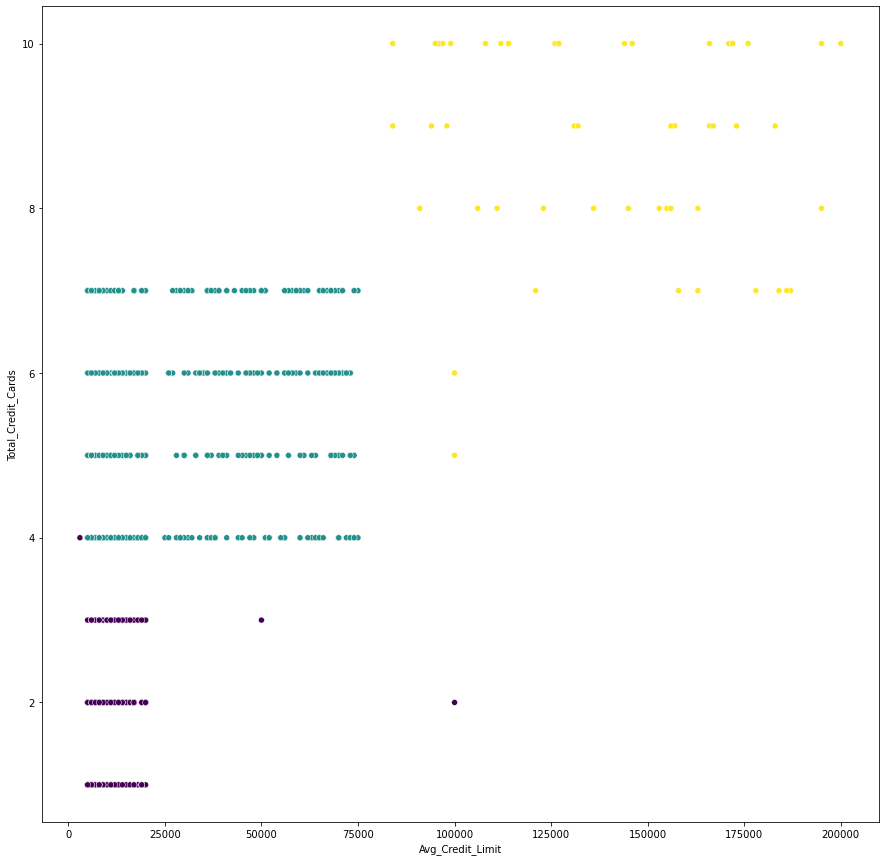

In [43]:
fig, ax = plt.subplots(figsize=(15,15))
sns.scatterplot(data_import['Avg_Credit_Limit'], data_import['Total_Credit_Cards'],  c = data_import['kmeans_clus'],ax=ax)

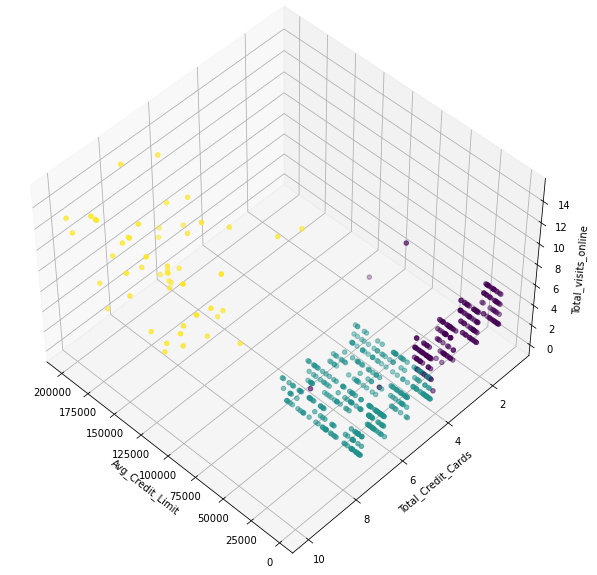

In [45]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Avg_Credit_Limit')
ax.set_ylabel('Total_Credit_Cards')
ax.set_zlabel('Total_visits_online')

ax.scatter(data_import['Avg_Credit_Limit'], data_import['Total_Credit_Cards'], data_import['Total_visits_online'], c= data_import['kmeans_clus'])
